**This notebook formats long names in newick files, to make them more Human readable.**

# Imports

In [1]:
import os
import ete3
from ete3 import Tree, TreeStyle, NodeStyle, AttrFace


# Declares

In [2]:
NEWICK_FILE = os.path.join("..", 
                           "results", 
                           "mammalian_REM2", 
                           "mammalian_REM2_codons.SA.FilterOutliers.fasta.treefile")

In [3]:
t = Tree(NEWICK_FILE, format=1 )

for node in t.traverse("postorder"):
    edit = node.name.split("_")
    if "PREDICTED" in edit:
        node.name = " ".join(edit[4:6])
    else:
        node.name = " ".join(edit[3:5])
    #end if
#end for


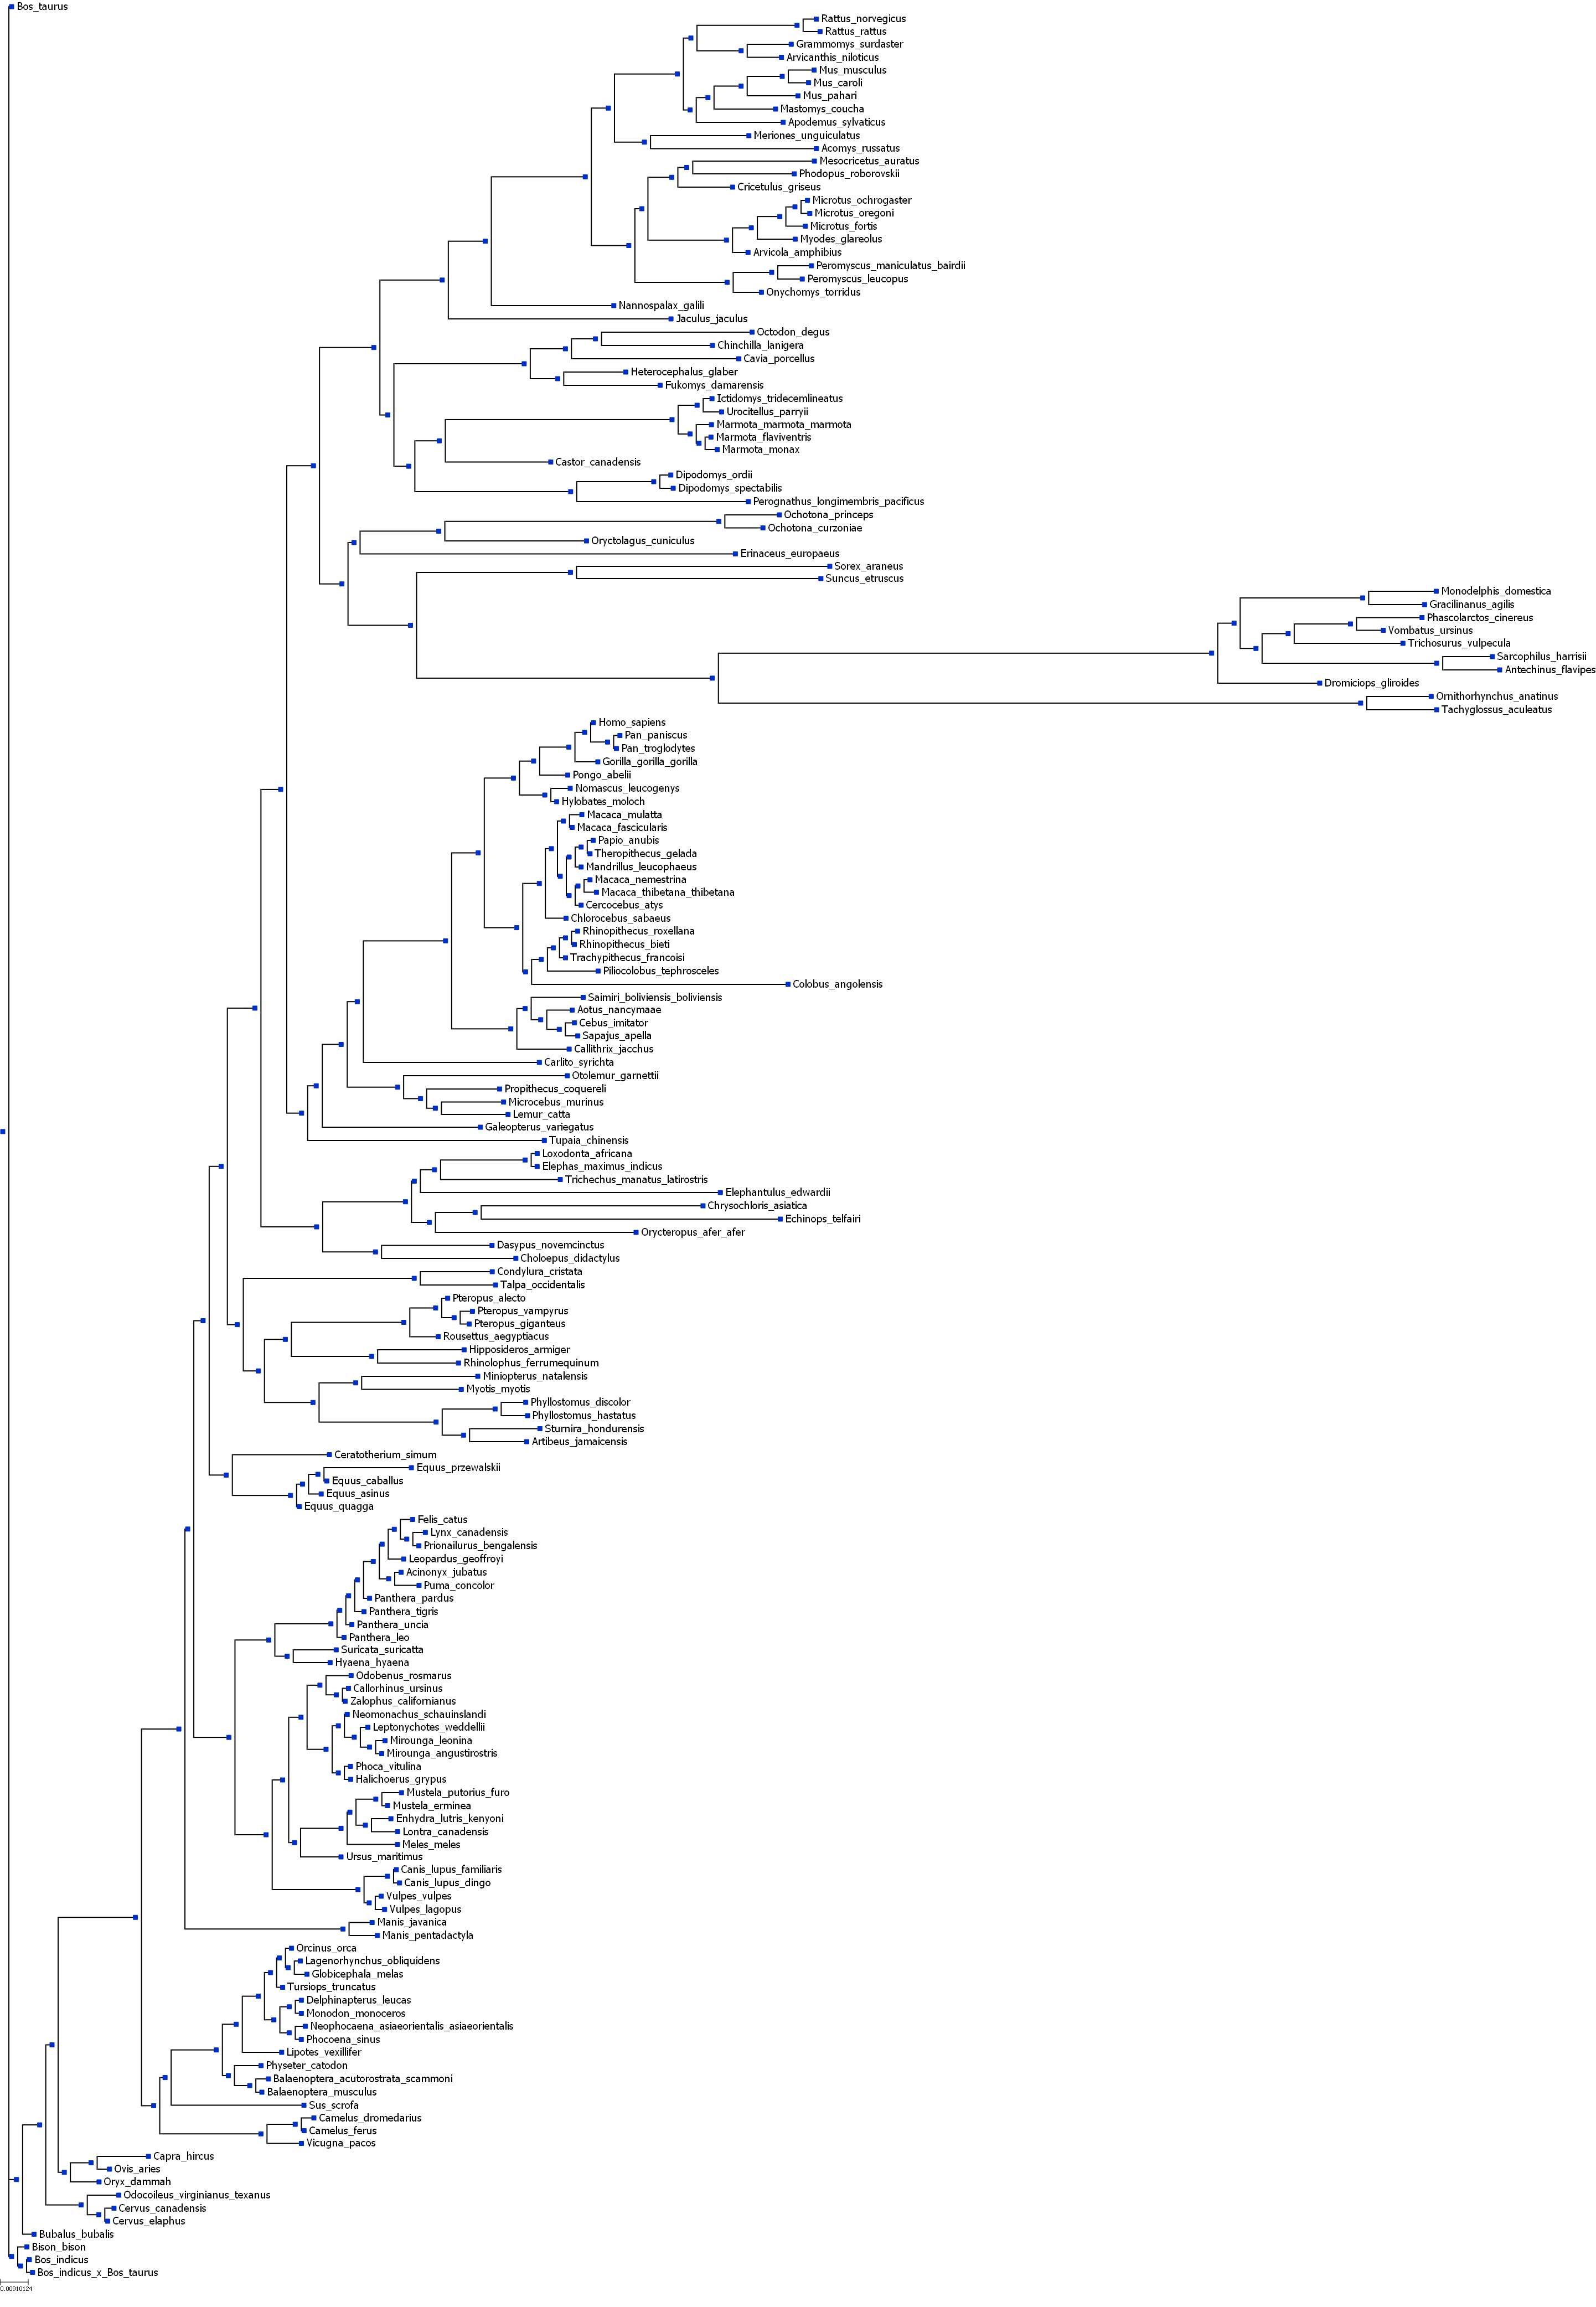

In [4]:
t = Tree(NEWICK_FILE, format=1 )
newick_dict = {}

for node in t.traverse("postorder"):
    #print(node.name.split("_"))
    original_name = node.name
    edit = node.name.split("_")
    #print(edit)
    # get location of RRAD
    if "RRAD" in edit:
        location = edit.index("RRAD") - 1
    elif "rad" in edit:
        location = edit.index("rad") - 1
    else:
        location = 5
    #end if
    
    if "PREDICTED" in edit:
        node.name = "_".join(edit[4: location + 1])
        newick_dict[original_name] = node.name 
    else:
        node.name = "_".join(edit[3: location + 1])
        newick_dict[original_name] = node.name 
    #end if
#end for

# init tree style
ts = TreeStyle()
# remove default labels
ts.show_leaf_name = False

widthscale= 2400

heightscale=5

height = t.get_farthest_node()[1]

ts.scale = widthscale / height

ts.branch_vertical_margin = heightscale

for n in t.traverse():
    nstyle = ete3.NodeStyle()
    nstyle['hz_line_width'] = 2
    nstyle['vt_line_width'] = 2
    nstyle['hz_line_color'] = 'black'
    nstyle['vt_line_color'] = 'black'
    nstyle['size'] = 8
    nstyle['shape'] = 'square'
    
    n.add_face(ete3.TextFace(f" {n.name}",
                                     ftype='Dejavu Sans',
                                     tight_text=True,
                                     fsize=14,
                                     fgcolor='black',
                                     ),
                                     column=0, 
                                     position='branch-right')
    
    
    
    n.set_style(nstyle)
#end for 
    
# render image on notebook
t.render("%%inline", tree_style=ts)



In [5]:
print("Number of nodes:", len(newick_dict.keys()))

Number of nodes: 176


# Labelled Tree

In [6]:
# mammalian_REM2_codons.SA.FilterOutliers.fasta.treefile
NEWICK_FILE_LABELLED = os.path.join("..", 
                                    "results", 
                                    "mammalian_REM2", 
                                    "mammalian_REM2_codons.SA.FilterOutliers.fasta.treefile.labelled")

with open(NEWICK_FILE_LABELLED, "r") as fh:
    newick_data = fh.readline()
    fh.close()
#end with

for item in newick_dict.keys():
    if item in newick_data:
        #print(newick_dict[item])
        newick_data = newick_data.replace(item, newick_dict[item])
    #end if
#end for

newick_data

'(Mus_musculus{Glires}:0.007803457,((((((((((((((((((((((Pan_troglodytes{Primates}:2.5942e-06,Pan_paniscus{Primates}:0.0011778046)Node23{Primates}:0.0047553067,Homo_sapiens{Primates}:2.1302e-06)Node22{Primates}:0.0023438394,Gorilla_gorilla_gorilla{Primates}:0.0066342503)Node21{Primates}:0.0087682495,Pongo_abelii{Primates}:0.008483758100000001)Node20{Primates}:0.0037265951,(Nomascus_leucogenys{Primates}:0.0055545127,Hylobates_moloch{Primates}:0.0009977937000000001)Node29{Primates}:0.0075768326)Node19{Primates}:0.008867421,((((((Macaca_mulatta{Primates}:0.0032318167,Macaca_fascicularis{Primates}:2.606e-06)Node37{Primates}:0.0010774948,Mandrillus_leucophaeus{Primates}:0.0010774616)Node36{Primates}:2.9747e-06,((Papio_anubis{Primates}:0.001076892,Theropithecus_gelada{Primates}:1.0279e-06)Node42{Primates}:0.0010776558,Cercocebus_atys{Primates}:0.0010776965)Node41{Primates}:1.0278e-06)Node35{Primates}:1.0278e-06,(Macaca_nemestrina{Primates}:0.0010771274,Macaca_thibetana_thibetana{Primates}:0.

In [7]:
# Save to file

NEWICK_FILE_LABELLED_OUTPUT = os.path.join("..", 
                                    "results", 
                                    "mammalian_REM2", 
                                    "mammalian_REM2_codons.SA.FilterOutliers.fasta.treefile.labelled.ForFigure")

with open(NEWICK_FILE_LABELLED_OUTPUT, "w") as text_file:
    print(newick_data, file=text_file)


In [18]:
# Next step, enter into phylotree
# https://phylotree.hyphy.org/